In [645]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import scipy.stats as sp_stat #Génération des données selon une loi de Poisson
import scipy.special as sp_spe #Cacul de la fonction de répartition
import scipy.interpolate as sp_interp #Interpolation des données

In [646]:
#Génération des données selon une loi de Poisson
mu_ni=5
loc=0
nbr=50
depth=100
ni=sp_stat.poisson.rvs(mu=mu_ni,loc=loc,size=nbr)
#ni=sp_stat.norm.rvs(loc=mu_ni,size=nbr)
#ni=sp_stat.logistic.rvs(mu_ni,nbr)
p_ni,bin_ni=np.histogram(ni,bins=15)
left,right = bin_ni[:-1],bin_ni[1:]
x_pni = np.array([left,right]).T.flatten()
y_pni = np.array([p_ni,p_ni]).T.flatten()
p_poisson=[sp_stat.poisson.pmf(k,mu=mu_ni,loc=loc) for k in range(depth)]

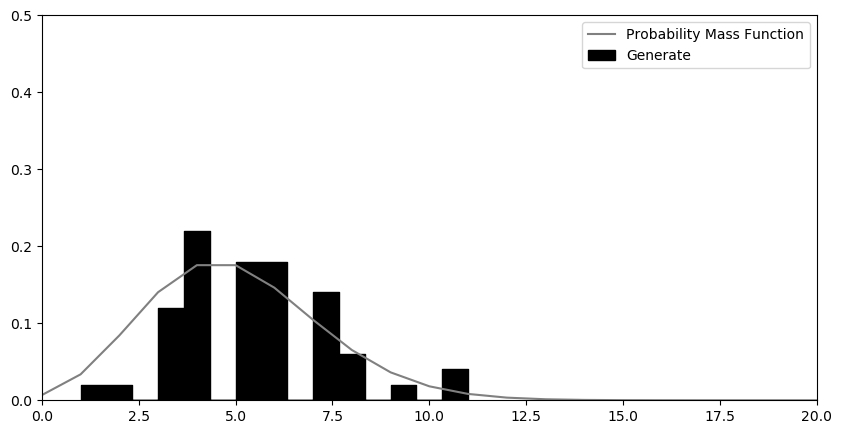

In [647]:
#Comparaison de la distribution des données générées par rapport à une vrai distribution poissonnienne
fig,ax=plt.subplots(figsize=(10,5))
ax.fill_between(x_pni,y_pni/nbr,color="black",label="Generate")
ax.plot(range(depth),p_poisson,color="grey",label="Probability Mass Function")
ax.set_ylim(0,0.5)
ax.set_xlim(0,20)
plt.legend()
plt.show()

In [648]:
#Calcul des fonctions de distribution cumulative
P_ni=np.cumsum(p_ni/nbr)
P_poisson=[sp_stat.poisson.cdf(k,mu=mu_ni,loc=loc) for k in range(depth)]

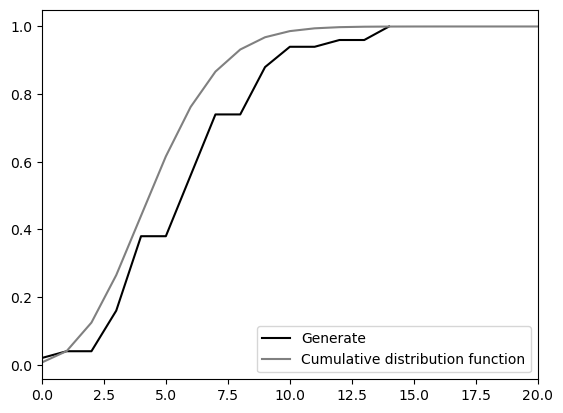

In [649]:
#Comparaison des fonction de distribution cumulative
fig,ax=plt.subplots()
ax.plot(range(len(P_ni)),P_ni,color="black",label="Generate")
ax.plot(range(len(P_poisson)),P_poisson,color="grey",label="Cumulative distribution function")
ax.set_xlim(0,20)
plt.legend()
plt.show()

In [650]:
#Créatiion de la fonction d'interpolation
interp_ni=sp_interp.interp1d(range(depth),P_poisson,kind="linear")
#interp_ni=sp_interp.interp1d(range(len(p_ni)),P_ni,kind="linear")

In [651]:
#Distribution avant l'inerpolation
p_before_ni,bin_before_ni=np.histogram(P_ni,bins=15)
left,right = bin_before_ni[:-1],bin_before_ni[1:]
x_p_before_ni = np.array([left,right]).T.flatten()
y_p_before_ni = np.array([p_before_ni,p_before_ni]).T.flatten()
mean_before=np.mean(y_p_before_ni/nbr)
sd_before=np.std(y_p_before_ni/nbr)
#Distribution après interpolation
y_test=interp_ni(ni)
p_interp_ni,bin_interp_ni=np.histogram(y_test,bins=15)
left,right = bin_interp_ni[:-1],bin_interp_ni[1:]
x_p_interp_ni = np.array([left,right]).T.flatten()
y_p_interp_ni = np.array([p_interp_ni,p_interp_ni]).T.flatten()
mean_after=np.mean(y_p_interp_ni/nbr)
sd_after=np.std(y_p_interp_ni/nbr)

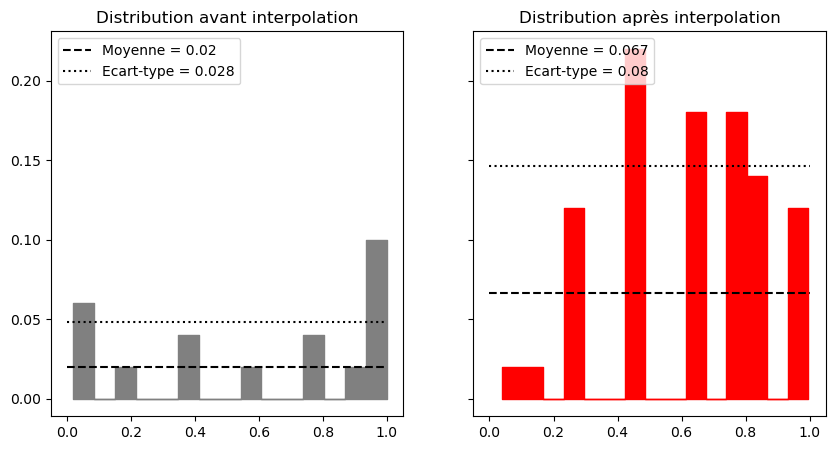

In [652]:
#Représentation avant/après interpolation
fig,ax=plt.subplots(1,2,figsize=(10,5),sharex=True,sharey=True)
ax[0].fill_between(x_p_before_ni,y_p_before_ni/nbr,color="grey")
ax[0].set_title("Distribution avant interpolation")
ax[0].hlines(mean_before,0,1,linestyle="dashed",color="black",label="Moyenne = "+str(round(mean_before,3)))
ax[0].hlines(mean_before+sd_before,0,1,linestyle="dotted",label="Ecart-type = "+str(round(sd_before,3)))
ax[0].legend(loc='upper left')

ax[1].fill_between(x_p_interp_ni,y_p_interp_ni/nbr,color="red")
ax[1].set_title("Distribution après interpolation")
ax[1].hlines(mean_after,0,1,linestyle="dashed",label="Moyenne = "+str(round(mean_after,3)))
ax[1].hlines(mean_after+sd_after,0,1,linestyle="dotted",label="Ecart-type = "+str(round(sd_after,3)))
ax[1].legend(loc='upper left')
plt.show()
